# Task 1: Data checking

In [12]:
import numpy as np
import pandas as pd
data = pd.read_csv('Flyzy_Flight_Cancellation.csv')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Flight ID                      3000 non-null   int64  
 1   Airline                        3000 non-null   object 
 2   Flight_Distance                3000 non-null   int64  
 3   Origin_Airport                 3000 non-null   object 
 4   Destination_Airport            3000 non-null   object 
 5   Scheduled_Departure_Time       3000 non-null   int64  
 6   Day_of_Week                    3000 non-null   int64  
 7   Month                          3000 non-null   int64  
 8   Airplane_Type                  3000 non-null   object 
 9   Weather_Score                  3000 non-null   float64
 10  Previous_Flight_Delay_Minutes  3000 non-null   float64
 11  Airline_Rating                 3000 non-null   float64
 12  Passenger_Load                 3000 non-null   f

In [14]:
data = data.drop_duplicates()

#### Checking for missing values

In [16]:
missing_values = data.isnull().sum()

print(missing_values)

Flight ID                        0
Airline                          0
Flight_Distance                  0
Origin_Airport                   0
Destination_Airport              0
Scheduled_Departure_Time         0
Day_of_Week                      0
Month                            0
Airplane_Type                    0
Weather_Score                    0
Previous_Flight_Delay_Minutes    0
Airline_Rating                   0
Passenger_Load                   0
Flight_Cancelled                 0
dtype: int64


#### Checking and removing outliers using boxplots

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Flight ID                      3000 non-null   int64  
 1   Airline                        3000 non-null   object 
 2   Flight_Distance                3000 non-null   int64  
 3   Origin_Airport                 3000 non-null   object 
 4   Destination_Airport            3000 non-null   object 
 5   Scheduled_Departure_Time       3000 non-null   int64  
 6   Day_of_Week                    3000 non-null   int64  
 7   Month                          3000 non-null   int64  
 8   Airplane_Type                  3000 non-null   object 
 9   Weather_Score                  3000 non-null   float64
 10  Previous_Flight_Delay_Minutes  3000 non-null   float64
 11  Airline_Rating                 3000 non-null   float64
 12  Passenger_Load                 3000 non-null   f

<Axes: ylabel='Flight ID'>

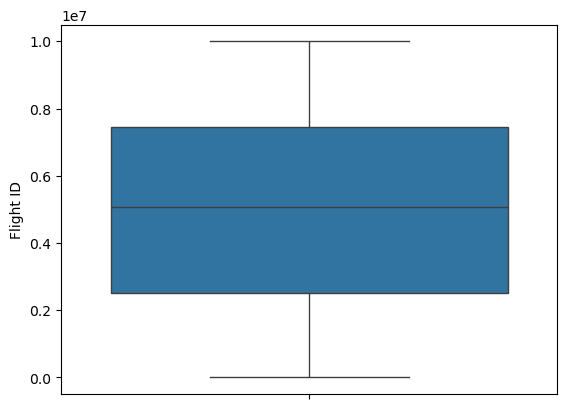

In [19]:
# Checking outliers for Flight Id column
import seaborn as sns
sns.boxplot(data['Flight ID'])

<Axes: ylabel='Flight_Distance'>

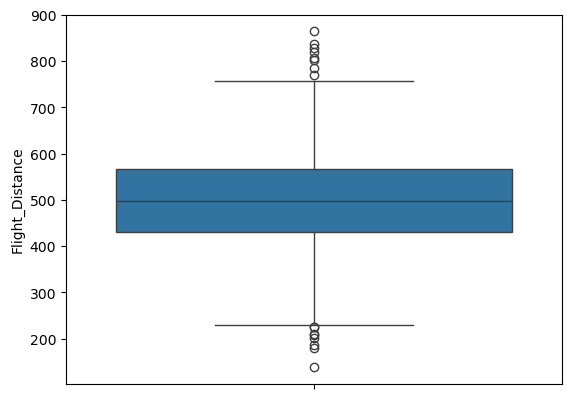

In [20]:
# Checking outliers for the Flight_Distance column
sns.boxplot(data['Flight_Distance'])

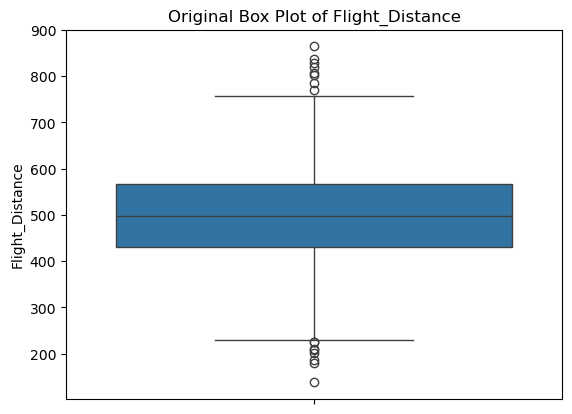

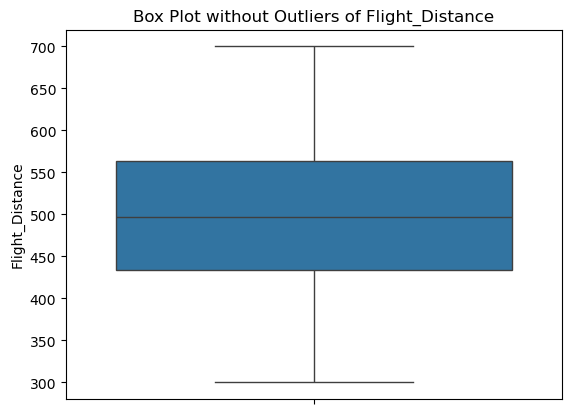

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def removal_box_plot(data, column, lower_threshold, upper_threshold):
    sns.boxplot(data[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = data[(data[column] >= lower_threshold) & (data[column] <= upper_threshold)]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()

    return removed_outliers

# Specify the threshold values
lower_threshold = 300
upper_threshold = 700

data_new = removal_box_plot(data, 'Flight_Distance', lower_threshold, upper_threshold)


<Axes: ylabel='Scheduled_Departure_Time'>

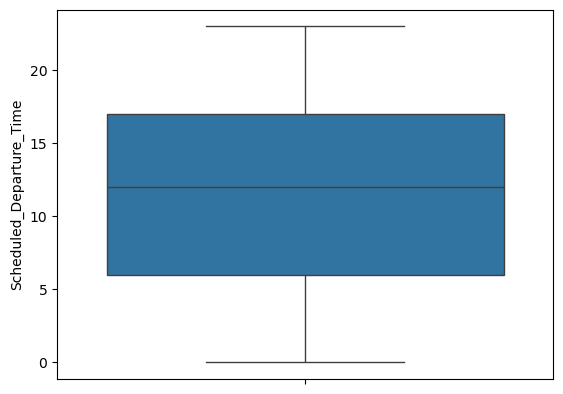

In [22]:
# Checking outliers for the Scheduled_Departure_Time column     
sns.boxplot(data_new['Scheduled_Departure_Time'])

<Axes: ylabel='Day_of_Week'>

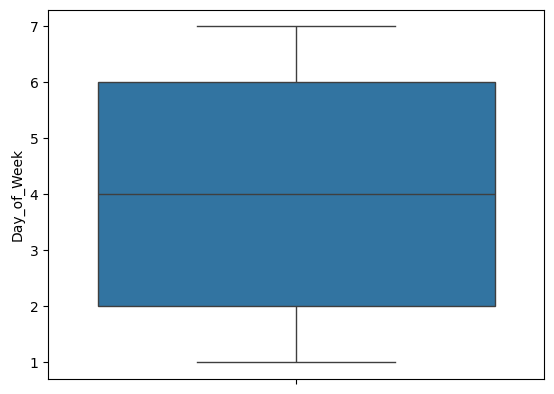

In [23]:
# Checking outliers for the Day_of_Week column     
sns.boxplot(data_new['Day_of_Week'])

<Axes: ylabel='Month'>

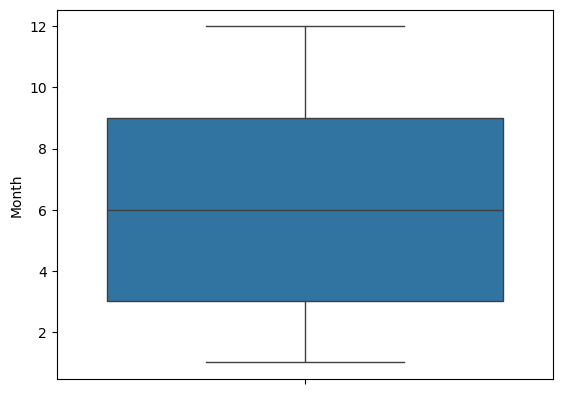

In [24]:
# Checking outliers for the Month column     
sns.boxplot(data_new['Month'])

<Axes: ylabel='Weather_Score'>

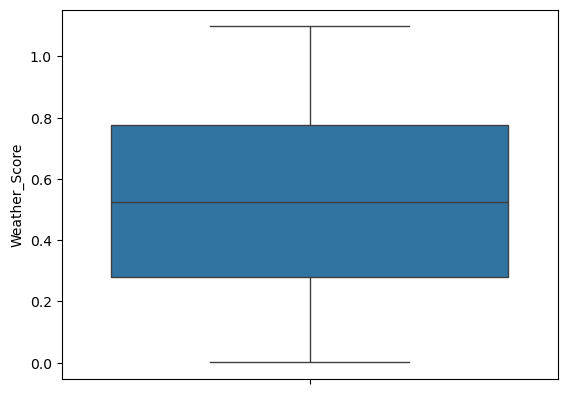

In [25]:
# Checking outliers for the Weather_Score column     
sns.boxplot(data_new['Weather_Score'])

<Axes: ylabel='Previous_Flight_Delay_Minutes'>

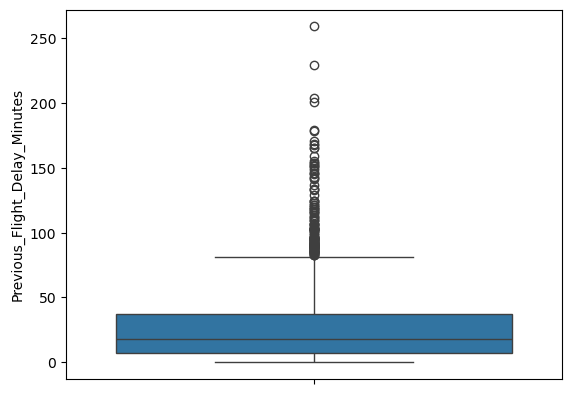

In [26]:
# Checking outliers for the Previous_Flight_Delay_Minutes column
sns.boxplot(data_new['Previous_Flight_Delay_Minutes'])

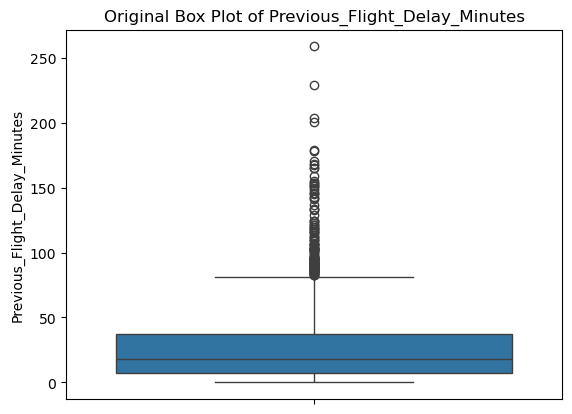

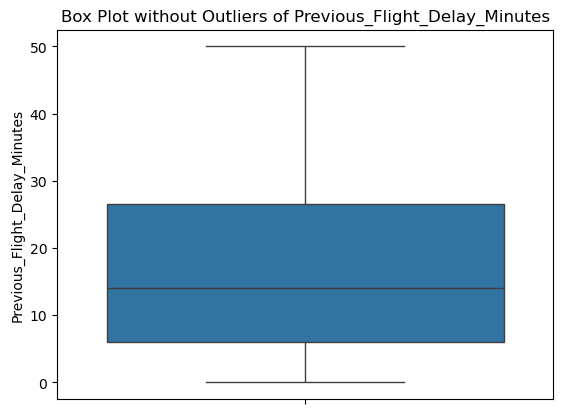

In [27]:
def removal_box_plot(data_new, column, threshold):
    sns.boxplot(data_new[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = data_new[data_new[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    
    return removed_outliers

threshold_value = 50

data_new1 = removal_box_plot(data_new, 'Previous_Flight_Delay_Minutes', threshold_value)

<Axes: ylabel='Airline_Rating'>

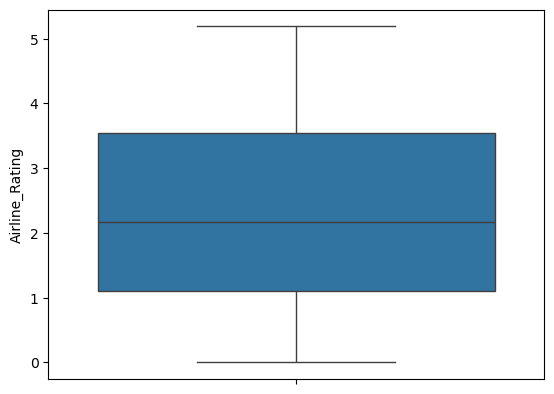

In [28]:
# Checking outliers for Airline_Rating column
sns.boxplot(data_new1['Airline_Rating'])

<Axes: ylabel='Passenger_Load'>

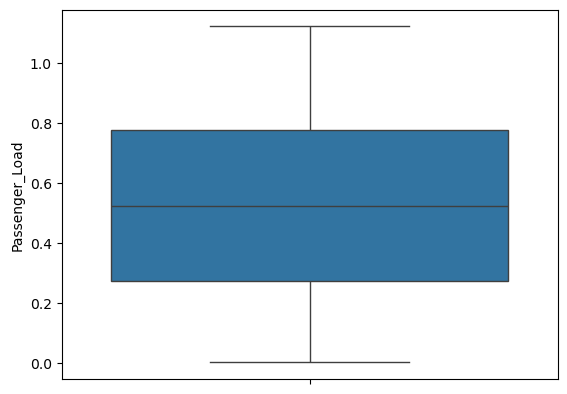

In [29]:
# Checking outliers for the Passenger_Load column
sns.boxplot(data_new1['Passenger_Load'])

<Axes: ylabel='Flight_Cancelled'>

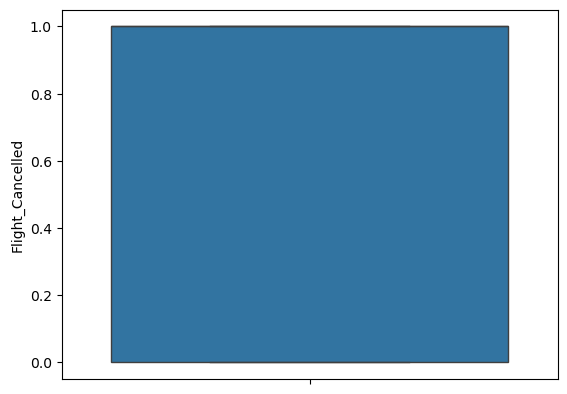

In [30]:
# Checking outliers for the Flight_Cancelled column
sns.boxplot(data_new1['Flight_Cancelled'])

#### Checking the data types for each column

In [32]:
print(data_new1.dtypes)

Flight ID                          int64
Airline                           object
Flight_Distance                    int64
Origin_Airport                    object
Destination_Airport               object
Scheduled_Departure_Time           int64
Day_of_Week                        int64
Month                              int64
Airplane_Type                     object
Weather_Score                    float64
Previous_Flight_Delay_Minutes    float64
Airline_Rating                   float64
Passenger_Load                   float64
Flight_Cancelled                   int64
dtype: object


In [33]:
data_new1.head()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.0,4.406848,0.256803,0
3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.0,0.998757,0.504077,1
4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.0,3.806206,0.019638,0
5,9450813,Airline B,446,Airport 4,Airport 5,3,5,2,Type D,0.030072,5.0,2.228958,0.424126,0


# Task 2: Exploratory Data Analysis

#### Descriptive statistics

In [37]:
# For numeric columns
data_new1.describe()

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
count,2.454000e+03,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000
mean,5.013131e+06,499.320293,11.538712,3.962510,6.374491,0.530025,17.423073,2.337628,0.521403,0.629584
std,2.850340e+06,88.768593,6.953395,2.021345,3.491230,0.290777,13.732761,1.430148,0.294602,0.483014
min,3.681000e+03,300.000000,0.000000,1.000000,1.000000,0.000965,0.000000,0.000103,0.001039,0.000000
25%,2.588012e+06,435.000000,6.000000,2.000000,3.000000,0.281619,6.000000,1.100178,0.272121,0.000000
50%,5.136469e+06,497.000000,12.000000,4.000000,6.000000,0.528497,14.000000,2.164122,0.524155,1.000000
75%,7.457813e+06,564.000000,18.000000,6.000000,9.000000,0.781446,26.500003,3.544712,0.776592,1.000000
max,9.992513e+06,700.000000,23.000000,7.000000,12.000000,1.098354,50.000000,5.189038,1.123559,1.000000


In [39]:
# For none numeric columns
data_new1.describe(include='object')

,Airline,Origin_Airport,Destination_Airport,Airplane_Type
count,2454,2454,2454,2454
unique,5,5,4,5
top,Airline A,Airport 1,Airport 2,Type A
freq,957,879,1340,941


#### Distribution of data

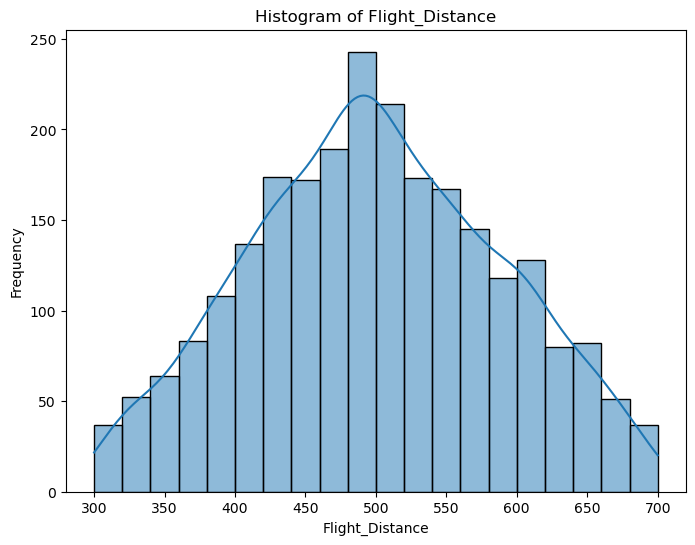

In [42]:
column_name = 'Flight_Distance'
plt.figure(figsize=(8, 6))
sns.histplot(data_new1['Flight_Distance'], kde=True, bins=20)
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

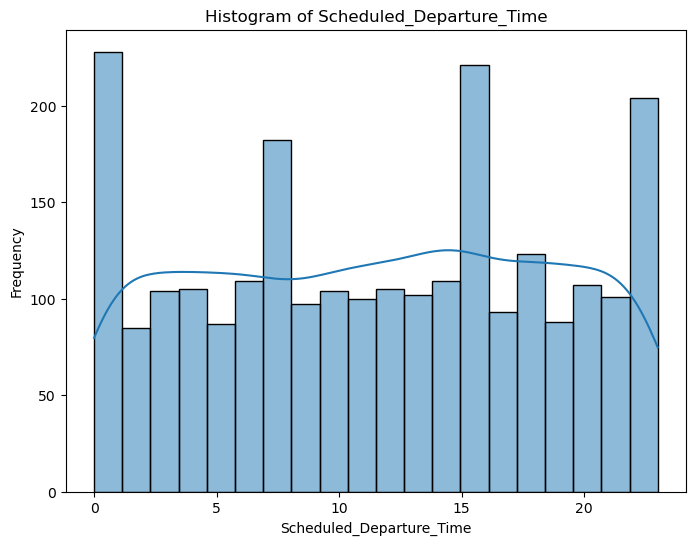

In [44]:
column_name = 'Scheduled_Departure_Time'
plt.figure(figsize=(8, 6))
sns.histplot(data_new1['Scheduled_Departure_Time'], kde=True, bins=20)
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

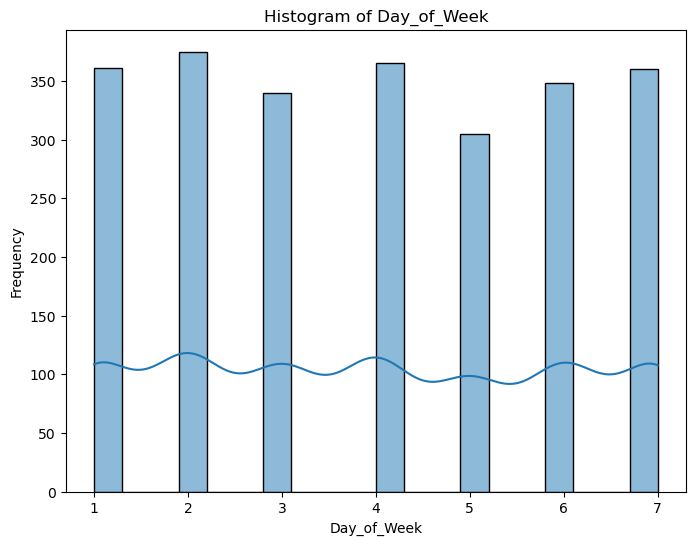

In [46]:
column_name = 'Day_of_Week'
plt.figure(figsize=(8, 6))
sns.histplot(data_new1['Day_of_Week'], kde=True, bins=20)
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

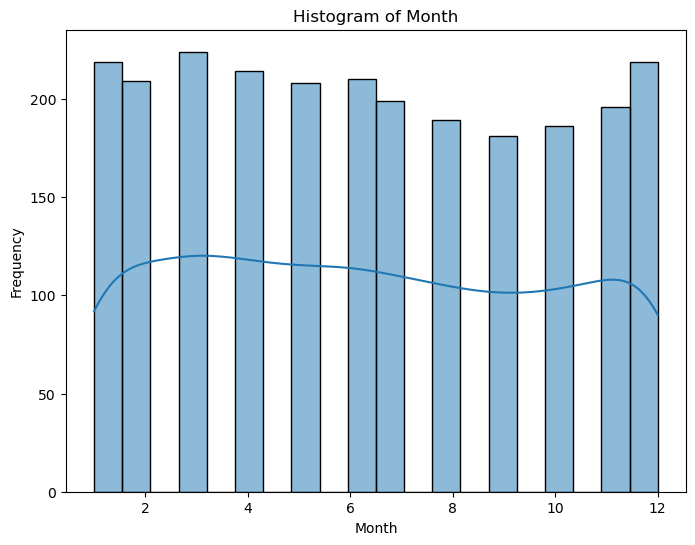

In [48]:
column_name = 'Month'
plt.figure(figsize=(8, 6))
sns.histplot(data_new1['Month'], kde=True, bins=20)
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

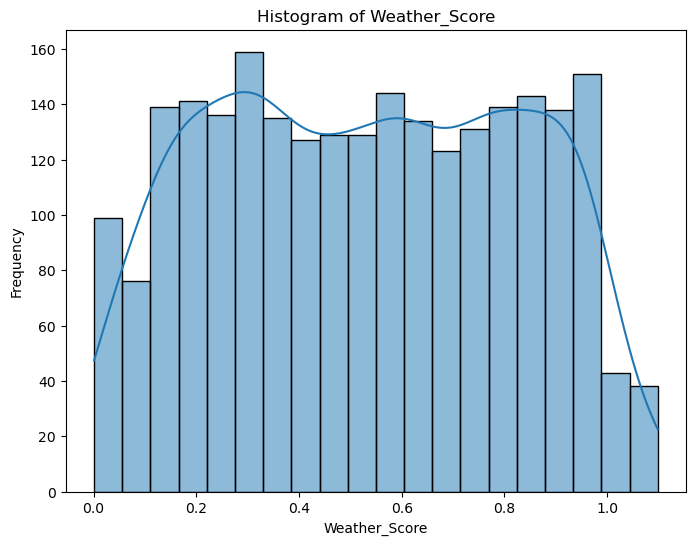

In [50]:
column_name = 'Weather_Score'
plt.figure(figsize=(8, 6))
sns.histplot(data_new1['Weather_Score'], kde=True, bins=20)
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

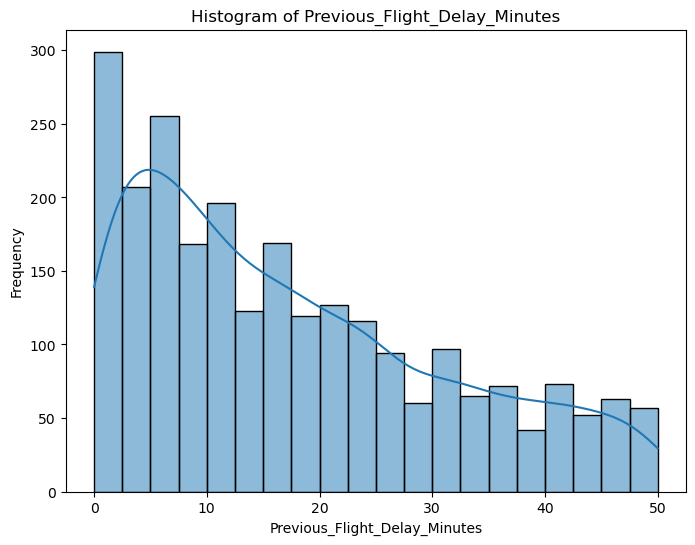

In [51]:
column_name = 'Previous_Flight_Delay_Minutes'
plt.figure(figsize=(8, 6))
sns.histplot(data_new1['Previous_Flight_Delay_Minutes'], kde=True, bins=20)
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

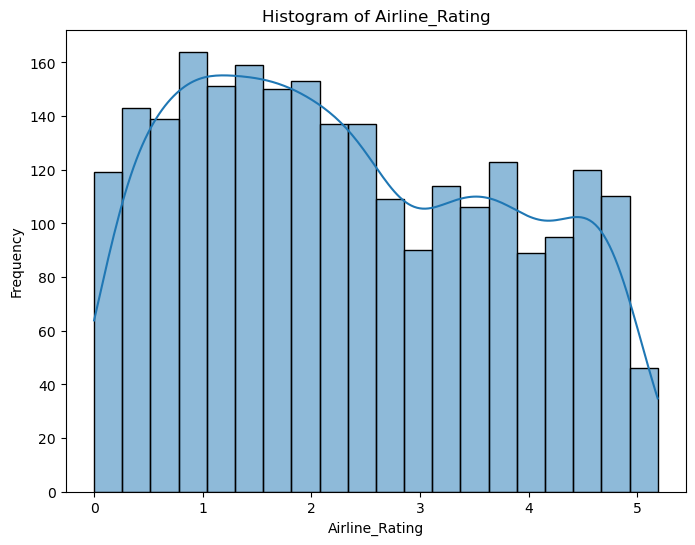

In [53]:
column_name = 'Airline_Rating'
plt.figure(figsize=(8, 6))
sns.histplot(data_new1['Airline_Rating'], kde=True, bins=20)
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

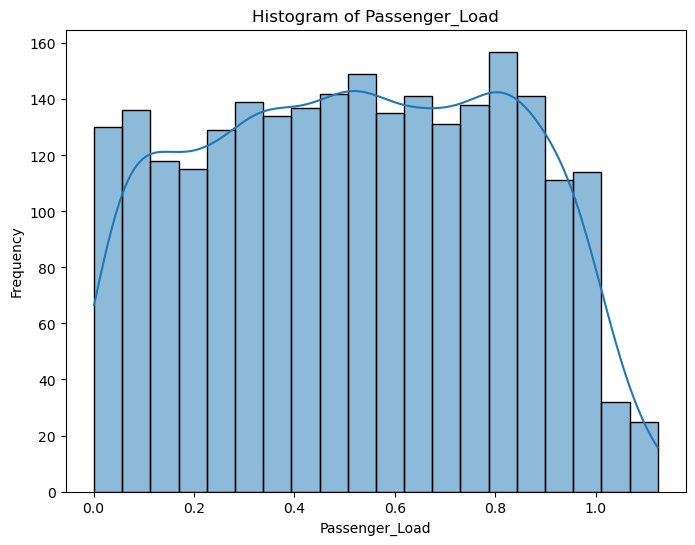

In [55]:
column_name = 'Passenger_Load'
plt.figure(figsize=(8, 6))
sns.histplot(data_new1['Passenger_Load'], kde=True, bins=20)
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

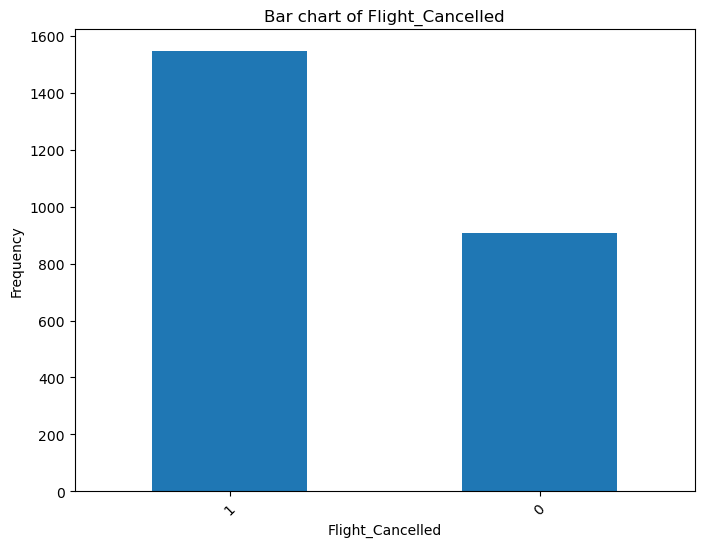

In [56]:
column_name= 'Flight_Cancelled'
plt.figure(figsize=(8, 6))
data_new1[column_name].value_counts().plot(kind='bar')
plt.title(f'Bar chart of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

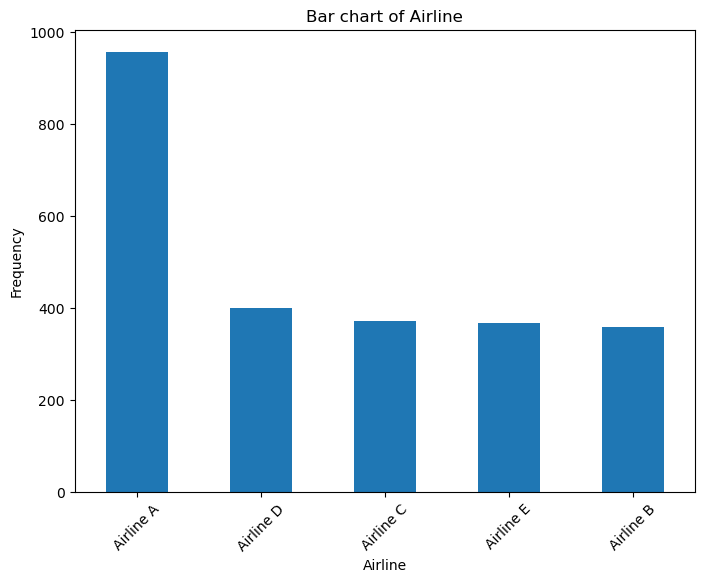

In [58]:
column_name= 'Airline'
plt.figure(figsize=(8, 6))
data_new1[column_name].value_counts().plot(kind='bar')
plt.title(f'Bar chart of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

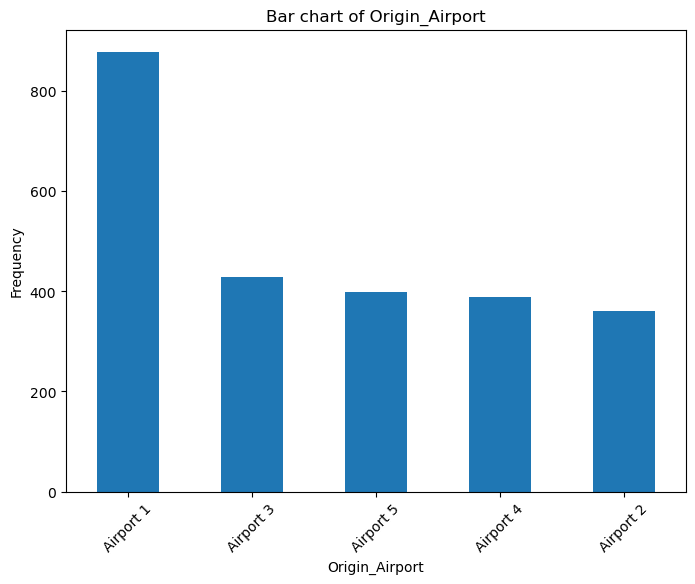

In [60]:
column_name= 'Origin_Airport'
plt.figure(figsize=(8, 6))
data_new1[column_name].value_counts().plot(kind='bar')
plt.title(f'Bar chart of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

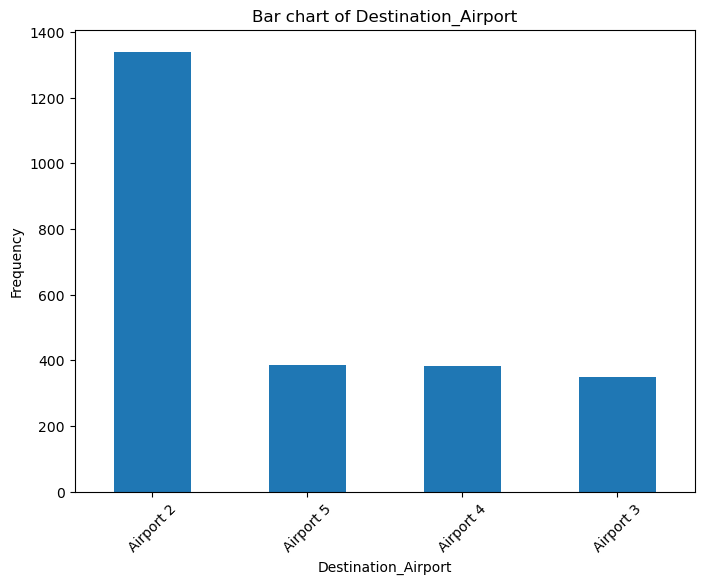

In [62]:
column_name= 'Destination_Airport'
plt.figure(figsize=(8, 6))
data_new1[column_name].value_counts().plot(kind='bar')
plt.title(f'Bar chart of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

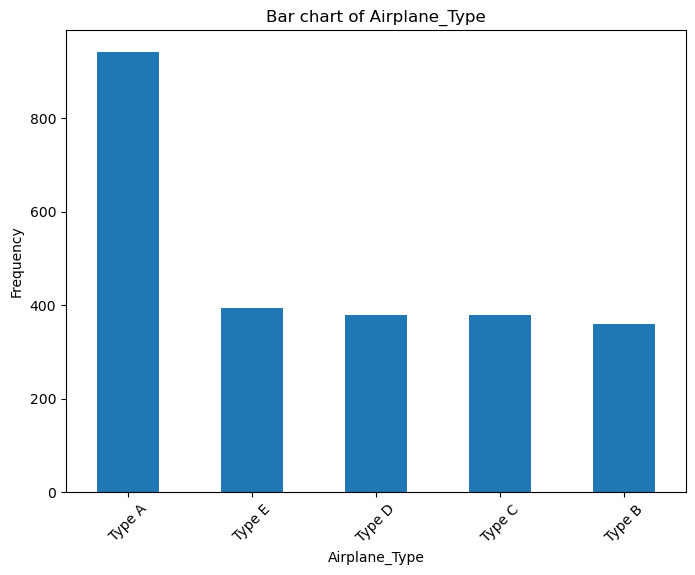

In [64]:
column_name= 'Airplane_Type'
plt.figure(figsize=(8, 6))
data_new1[column_name].value_counts().plot(kind='bar')
plt.title(f'Bar chart of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Relationship between features

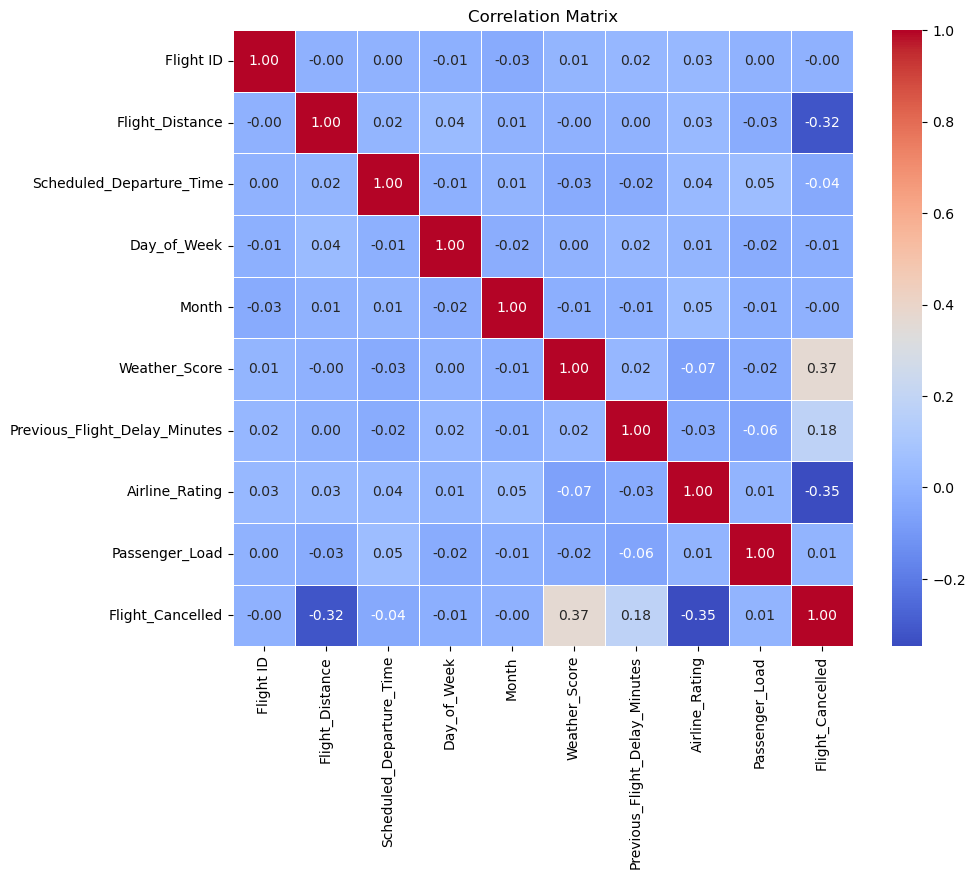

In [67]:
numerical_columns = ['Flight ID','Flight_Distance', 'Scheduled_Departure_Time', 'Day_of_Week', 'Month', 
                     'Weather_Score', 'Previous_Flight_Delay_Minutes', 'Airline_Rating', 
                     'Passenger_Load', 'Flight_Cancelled']  


correlation_matrix = data_new1[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Relationship between features and target variable

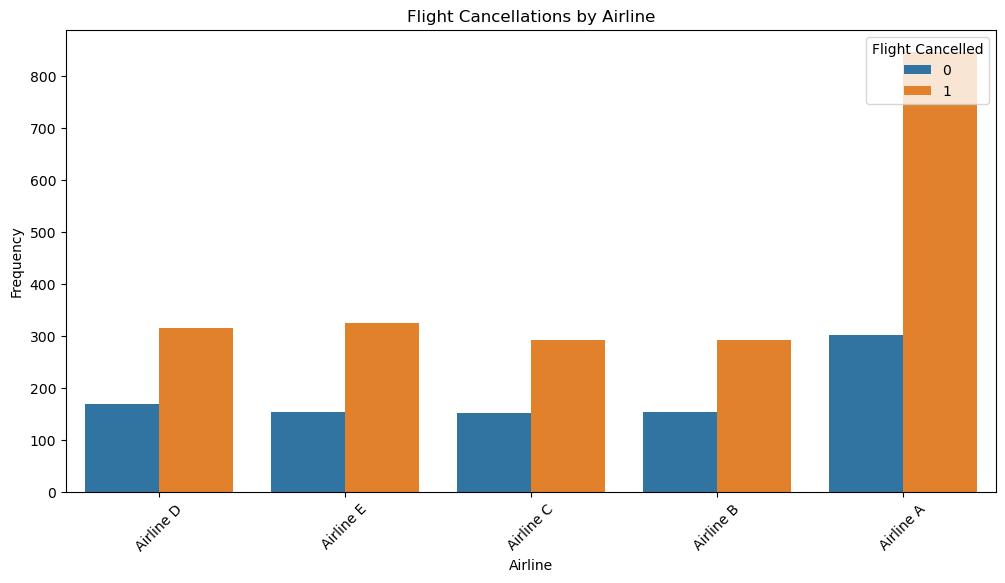

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='Airline', hue='Flight_Cancelled', data=data)
plt.title('Flight Cancellations by Airline')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Flight Cancelled', loc='upper right')
plt.show()

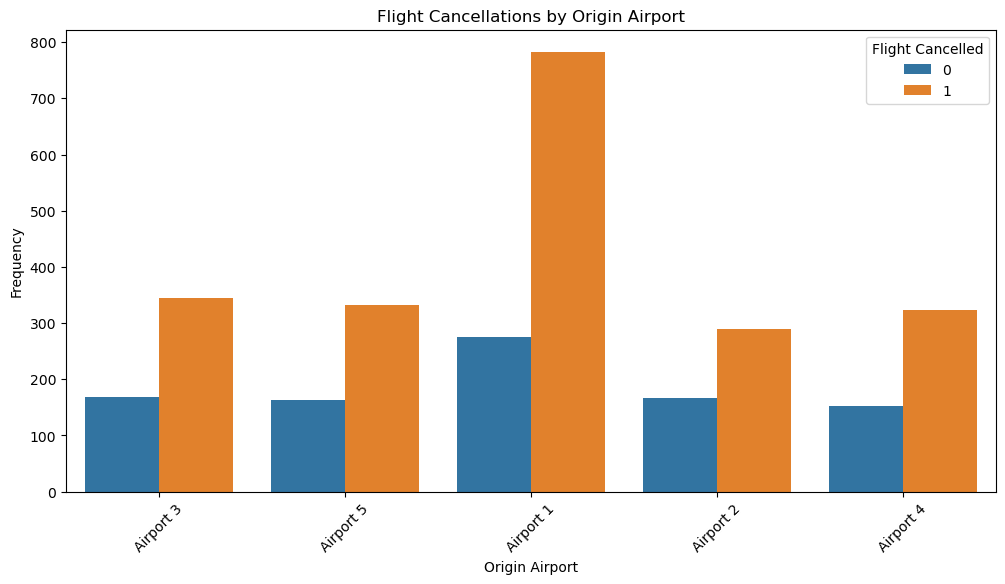

In [72]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Origin_Airport', hue='Flight_Cancelled', data=data)
plt.title('Flight Cancellations by Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Flight Cancelled', loc='upper right')
plt.show()

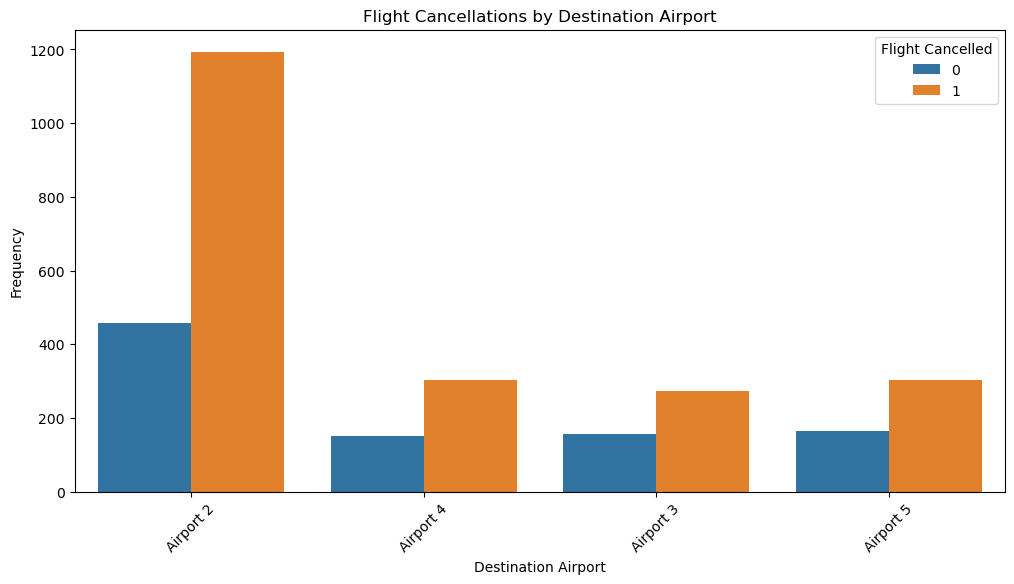

In [74]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Destination_Airport', hue='Flight_Cancelled', data=data)
plt.title('Flight Cancellations by Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Flight Cancelled', loc='upper right')
plt.show()

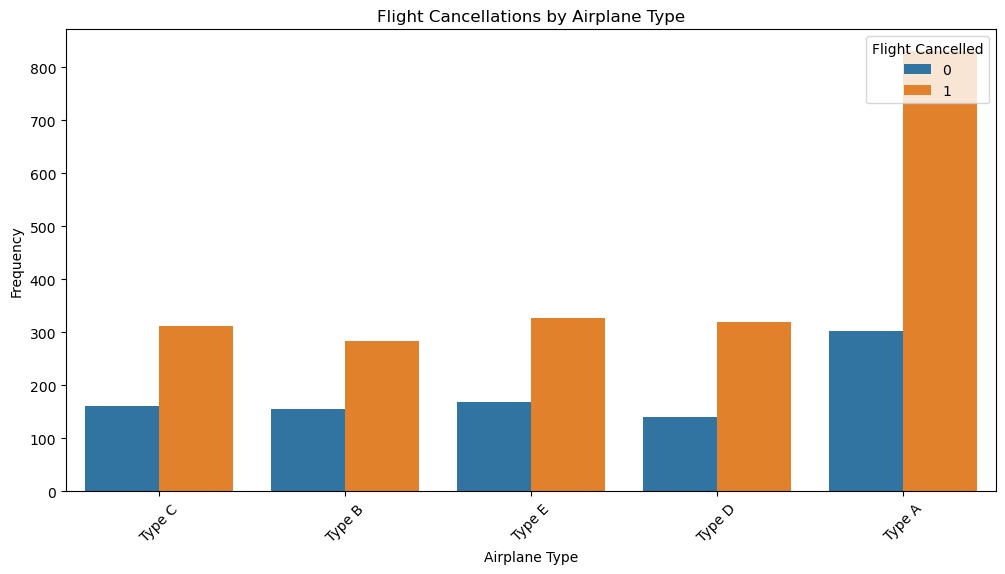

In [76]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Airplane_Type', hue='Flight_Cancelled', data=data)
plt.title('Flight Cancellations by Airplane Type')
plt.xlabel('Airplane Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Flight Cancelled', loc='upper right')
plt.show()

In [78]:
# Correlation coefficients between numerical features and target variable
correlation_matrix = data_new1[numerical_columns + ['Flight_Cancelled']].corr()
correlation_with_target = correlation_matrix['Flight_Cancelled'].drop('Flight_Cancelled')
print('Correlation with Target Variable:')
print(correlation_with_target)

Correlation with Target Variable:
                               Flight_Cancelled  Flight_Cancelled
Flight ID                             -0.003791         -0.003791
Flight_Distance                       -0.317200         -0.317200
Scheduled_Departure_Time              -0.035845         -0.035845
Day_of_Week                           -0.011724         -0.011724
Month                                 -0.003768         -0.003768
Weather_Score                          0.367696          0.367696
Previous_Flight_Delay_Minutes          0.181291          0.181291
Airline_Rating                        -0.346962         -0.346962
Passenger_Load                         0.006253          0.006253


## Preprocessing and Model Building

#### Encoding categorical variables

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [83]:
# Selecting features and target variable
X = data_new1.drop(['Flight ID', 'Flight_Cancelled'], axis=1)  # Features
y = data_new1['Flight_Cancelled']  # target variables

In [84]:
# Performing one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

In [85]:
print(X_encoded.head())

   Flight_Distance  Scheduled_Departure_Time  Day_of_Week  Month  \
0              475                         4            6      1   
2              565                        17            3      9   
3              658                         1            1      8   
4              566                        19            7     12   
5              446                         3            5      2   

   Weather_Score  Previous_Flight_Delay_Minutes  Airline_Rating  \
0       0.225122                            5.0        2.151974   
2       0.093920                           18.0        4.406848   
3       0.656750                           13.0        0.998757   
4       0.505211                            4.0        3.806206   
5       0.030072                            5.0        2.228958   

   Passenger_Load  Airline_Airline A  Airline_Airline B  ...  \
0        0.477202              False              False  ...   
2        0.256803              False              False  ...

In [86]:
# Scaling numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [87]:
# Displaying the scaled features
print(X_scaled)

[[0.4375     0.17391304 0.83333333 ... 1.         0.         0.        ]
 [0.6625     0.73913043 0.33333333 ... 1.         0.         0.        ]
 [0.895      0.04347826 0.         ... 0.         0.         0.        ]
 ...
 [0.4025     0.34782609 0.33333333 ... 0.         0.         0.        ]
 [0.41       0.2173913  0.66666667 ... 0.         0.         1.        ]
 [0.1725     0.04347826 0.         ... 0.         0.         0.        ]]


### Splitting the data into training and test sets

In [89]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and test sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Test set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (1963, 27) Target: (1963,)
Test set - Features: (491, 27) Target: (491,)


## Model Building: Building a Logistic Regression model.

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
# Initializing the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

In [93]:
# Fitting the model to the training data
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [94]:
# Printing the model coefficients
print("Model Coefficients:", logreg_model.coef_)

Model Coefficients: [[-4.05118483e+00 -1.90882117e-01 -1.37855059e-01  1.23627649e-01
   3.78803113e+00  1.90500685e+00 -3.14602747e+00  1.51168746e-01
   5.47642618e-02 -1.07207793e-01  1.33120971e-02  2.52625859e-04
   5.55544829e-02 -6.23773948e-02 -1.73793265e-01  8.18748916e-02
   1.03423520e-01  6.75479232e-02  8.96760229e-02 -9.12391588e-02
   1.30210000e-01 -1.11971190e-01  7.96185751e-02 -8.79788695e-02
  -2.00520033e-01  2.00092239e-01  2.54637627e-02]]


In [95]:
# Printing the model intercept
print("Model Intercept:", logreg_model.intercept_)

Model Intercept: [1.73883625]


### Model Evaluation: Evaluating the model using appropriate metrics and the test data.

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [98]:
# Predicting the target variable for the test set
y_pred = logreg_model.predict(X_test)

In [99]:
# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [100]:
# Printing the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7841140529531568
Precision: 0.7945619335347432
Recall: 0.8737541528239202
F1-score: 0.8322784810126582
ROC AUC Score: 0.7579297079909075
